In [141]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample

from itertools import chain
from random import sample 
import scipy

import sklearn.model_selection as skl

## 1. Read the Data
First read in the dataframe. You'll notice it's similar to the dataframe that you ended the final solution with in Lesson 2, Exercise 4, only with more data:

In [142]:
d = pd.read_csv('findings_data_5000.csv')
d.head()
d.describe()

,Unnamed: 0,Patient ID,Patient Age,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2500.000000,2500.000000,46.800960,0.090418,0.024405,0.040208,0.021404,0.112222,0.021204,0.016203,0.002601,0.167233,0.050610,0.548910,0.055011,0.031606,0.011002,0.044009
std,1443.231328,1443.231328,17.362326,0.286808,0.154318,0.196466,0.144742,0.315672,0.144079,0.126269,0.050934,0.373221,0.219222,0.497652,0.228025,0.174967,0.104323,0.205135
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.500000,1250.500000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2500.000000,2500.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,3749.500000,3749.500000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4999.000000,4999.000000,411.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2. Understand the Distribution
Just like in Lesson 2, Exercise 4, we want to see how different diseases are distributed with our disease of interest, as well as how age and gender are distributed:

In [143]:
all_labels = np.unique(list(chain(*d['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]

[Text(0, 0.5, 'Number of Images with Label')]

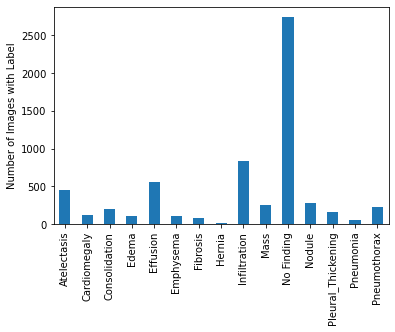

In [144]:
ax = d[all_labels].sum().plot(kind='bar')
ax.set(ylabel = 'Number of Images with Label')

**Since there are many combinations of potential findings, let's look at the 30 most common co-occurrences:**

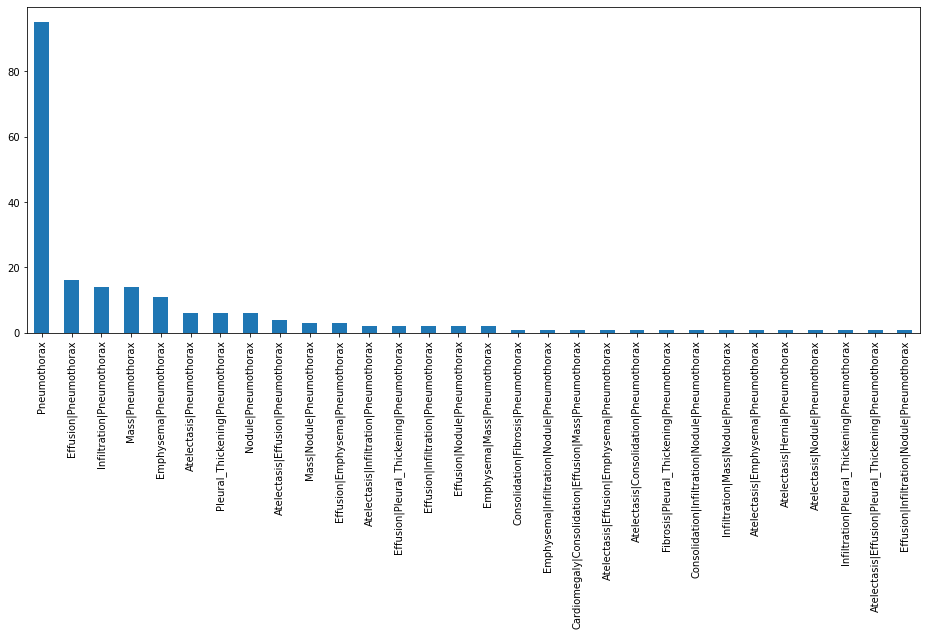

In [145]:
plt.figure(figsize=(16,6))
d[d.Pneumothorax==1]['Finding Labels'].value_counts()[0:30].plot(kind='bar')

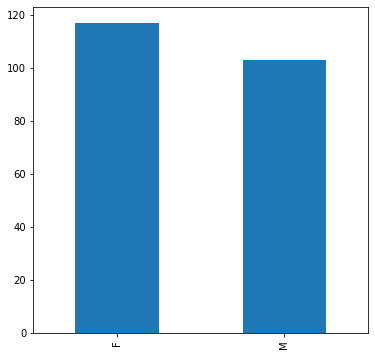

In [146]:
plt.figure(figsize=(6,6))
d[d.Pneumothorax ==1]['Patient Gender'].value_counts().plot(kind='bar')

(array([12., 18., 13., 21., 20., 47., 50., 26.,  9.,  4.]),
 array([ 7. , 14.6, 22.2, 29.8, 37.4, 45. , 52.6, 60.2, 67.8, 75.4, 83. ]),
 <a list of 10 Patch objects>)

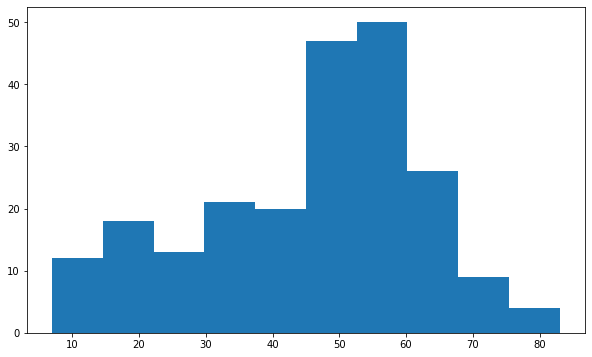

In [147]:
plt.figure(figsize=(10,6))
plt.hist(d[d.Pneumothorax==1]['Patient Age'])

## 3. To Do - Exercise - Split the Data into Train/Test Partitions
Now, knowing what we know from above, let's create the appropriate training and validation sets for a model that we want to train to classify the presence of a Pneumothorax. Also, take care of the following conditions: 
1. To have _EQUAL_ amount of positive and negative cases of Pneumothorax in Training
2. To have 20% positive cases of Pneumothorax in the Test Set

**Hint: you can random sample the negative cases to obtain a balanced training set.**

The skl.train_test_split method will split the total cases into 80% training set and 20% validating set, using the stratify params we passed in. That means each set will have the same/similar percentage of 'Pneumothorax' cases.

In [148]:
train_df, valid_df = skl.train_test_split(d, 
                                   test_size = 0.2, 
                                   stratify = d['Pneumothorax'])

In [149]:
train_df['Pneumothorax'].describe()
len(train_df)

3999

In [150]:
valid_df['Pneumothorax'].describe()

count    1000.000000
mean        0.044000
std         0.205198
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Pneumothorax, dtype: float64

In [151]:
train_df['Pneumothorax'].sum() / len(train_df)

0.04401100275068767

In [152]:
valid_df['Pneumothorax'].sum() / len(valid_df)

0.044

In [153]:
train_df.describe()

,Unnamed: 0,Patient ID,Patient Age,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,2510.915479,2510.915479,46.715179,0.088522,0.026257,0.040260,0.021005,0.108777,0.020505,0.015254,0.002751,0.169292,0.052513,0.550388,0.055264,0.031008,0.011503,0.044011
std,1442.665839,1442.665839,17.483578,0.284088,0.159917,0.196593,0.143420,0.311398,0.141738,0.122576,0.052381,0.375057,0.223087,0.497517,0.228523,0.173360,0.106646,0.205145
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1264.500000,1264.500000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2521.000000,2521.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,3762.500000,3762.500000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4998.000000,4998.000000,411.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**@ p_inds: cases in the training set are positive for Pneumothorax
  @ np_inds: cases in the training set that are negative for Pneumothorax
  dataFrame.index gives you the row labels
  tolist() turns panda arrays into python arrays**

In [154]:
p_inds = train_df[train_df.Pneumothorax == 1].index.tolist()
np_inds = train_df[train_df.Pneumothorax == 0].index.tolist()

In python, you can combine to arrays using +: [p_inds + np_sample]
dataFrame.loc : You can pass in a List of labels (python array). Note using [[]] returns a DataFrame.

In [155]:
len(p_inds)
np_sample = sample(np_inds, len(p_inds))
train_df = train_df.loc[p_inds + np_sample]

Here we can verify the number of positive cases is 50% of the entire training set.
dataFrame['Column Name'].sum() gives you the sum of that entire column
since 0 is negative, 1 is positive, the sum = total positive cases

In [157]:
train_df['Pneumothorax'].sum()/len(train_df)

0.5

Condition 2 - To have 20% positive cases of Pneumothorax in the Test Set
Finally, we want to make the balance in our validation set more like 20-80 since our exercise told us that the prevalence of Pneumothorax in this clinical situation is about 20%:

In [158]:
p_inds = valid_df[valid_df.Pneumothorax == 1].index.tolist()
np_inds = valid_df[valid_df.Pneumothorax == 0].index.tolist()
len(p_inds)

44

In [159]:
np_sample = sample(np_inds, len(p_inds) * 4)

In [160]:
valid_df = valid_df.loc[p_inds + np_sample]

In [161]:
valid_df.describe()

,Unnamed: 0,Patient ID,Patient Age,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,2476.218182,2476.218182,46.177273,0.100000,0.013636,0.036364,0.009091,0.095455,0.031818,0.009091,0.004545,0.154545,0.063636,0.459091,0.063636,0.054545,0.013636,0.200000
std,1387.063851,1387.063851,17.536926,0.300684,0.116240,0.187620,0.095128,0.294512,0.175916,0.095128,0.067420,0.362295,0.244661,0.499460,0.244661,0.227609,0.116240,0.400912
min,17.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1404.500000,1404.500000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2359.000000,2359.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3718.000000,3718.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4976.000000,4976.000000,83.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [162]:
valid_df['Pneumothorax'].sum()/len(valid_df)

0.2